In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data/RSCCASN.csv',parse_dates=True,index_col='DATE')

In [3]:
df.head(5)

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


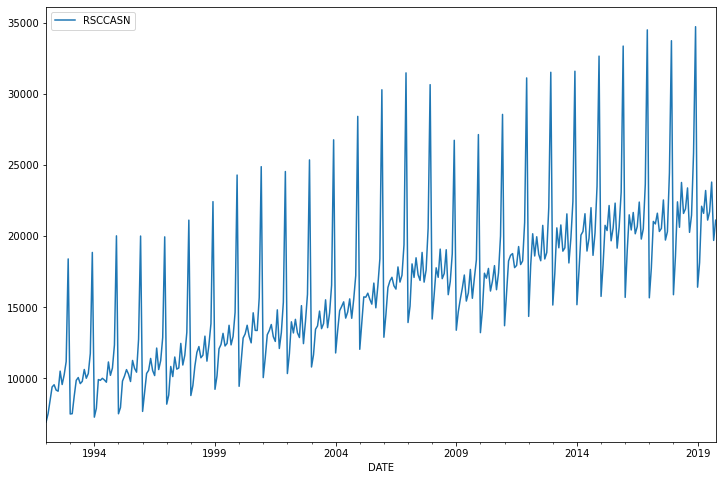

In [4]:
df.plot(figsize=(12,8))

In [5]:
len(df)

334

In [6]:
df

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [7]:
train=df[:316]

In [8]:
test=df[316:]

In [9]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

In [10]:
minmax.fit(train)

MinMaxScaler()

In [11]:
Train=minmax.transform(train)
Test=minmax.transform(test)

In [12]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [13]:
length=12

generator=TimeseriesGenerator(Train,Train,length=length,batch_size=1)

In [14]:
X,y=generator[0]

In [15]:
X

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]])

In [16]:
y

array([[0.02047633]])

In [17]:
Train

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053],
       [0.08146965],
       [0.07860151],
       [0.12979233],
       [0.09566512],
       [0.1203892 ],
       [0.15426227],
       [0.41595266],
       [0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895],
       [0.11345484],
       [0.09791606],
       [0.10368864],
       [0.13396747],
       [0.11163956],
       [0.12372931],
       [0.17506535],
       [0.43250799],
       [0.0124165 ],
       [0.03499855],
       [0.10829945],
       [0.10641156],
       [0.11149434],
       [0.10728289],
       [0.10154662],
       [0.1531731 ],
       [0.11904589],
       [0.13767064],
       [0.19663085],
       [0.47480395],
       [0.02105722],
       [0.03714058],
       [0.10445106],
       [0.11726692],
       [0.13367703],
       [0.12209556],
       [0.10332559],
       [0.1570578 ],
       [0.13694453],
       [0.12710572],
       [0.21104415],
       [0.474

In [18]:
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential

In [19]:
n_features=1

model=Sequential()

model.add(Dense(100,activation='relu',input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer='Adam',loss='mse')

In [20]:
generator=TimeseriesGenerator(Train,Train,length=length,batch_size=1)

validation_generator=TimeseriesGenerator(Test,Test,length=length,batch_size=1)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
earlystopping=EarlyStopping(monitor='val_loss',patience=2)

In [22]:
model.fit(generator,epochs=5,validation_data=validation_generator,callbacks=[earlystopping])

Epoch 1/5
304/304 [==============================] - 1s 4ms/step - loss: 0.0302 - val_loss: 0.0133
Epoch 2/5
304/304 [==============================] - 1s 3ms/step - loss: 0.0254 - val_loss: 0.0122
Epoch 3/5
304/304 [==============================] - 1s 4ms/step - loss: 0.0250 - val_loss: 0.0104
Epoch 4/5
304/304 [==============================] - 1s 3ms/step - loss: 0.0246 - val_loss: 0.0111
Epoch 5/5
304/304 [==============================] - 1s 3ms/step - loss: 0.0242 - val_loss: 0.0160


In [23]:
first_eval_batch=Train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

In [24]:
pred=model.predict(current_batch)

In [25]:
pred

array([[[0.43022993],
        [0.424266  ],
        [0.42541823],
        [0.433839  ],
        [0.41945907],
        [0.4241849 ],
        [0.44122002],
        [0.47724038],
        [0.33620188],
        [0.4023671 ],
        [0.43332672],
        [0.42585638]]], dtype=float32)

In [26]:
Test

array([[0.61087714],
       [0.53191258],
       [0.54389341],
       [0.59697212],
       [0.4836625 ],
       [0.52770113],
       [0.68592071],
       [1.00813244],
       [0.34388615],
       [0.40647691],
       [0.55021057],
       [0.53220302],
       [0.59040081],
       [0.51499419],
       [0.53645077],
       [0.61185739],
       [0.46314987],
       [0.51463114]])

In [1]:
model.history.history

NameError: name 'model' is not defined